In [11]:
import warnings
warnings.filterwarnings('ignore')

# !pip install allennlp

# Dataset Creation

In [12]:
import pandas as pd
import numpy as np
import random

# Number of samples
n_samples = 1000

# Generate random ticket IDs
ticket_ids = range(10001, 10001 + n_samples)

# Dummy customer texts (just for illustration, in a real-world scenario these will be more diverse and meaningful)
customer_texts = [
    "I can't log into my account.",
    "The application is crashing frequently.",
    "How do I reset my password?",
    "The system is too slow.",
    "Data is not syncing across devices.",
    "I received a wrong bill.",
    "The UI is not user-friendly.",
    "My payment got declined.",
    "I am facing issues with the new update.",
    "How do I backup my data?"
]

# Randomly assign customer texts to ticket IDs
texts = [random.choice(customer_texts) for _ in range(n_samples)]

# Severity levels
severities = ["low", "medium", "high", "critical"]

# Randomly assign severity levels to ticket IDs
severity_labels = [random.choice(severities) for _ in range(n_samples)]

# Create a DataFrame
df = pd.DataFrame({
    "ticket_id": ticket_ids,
    "customer_text": texts,
    "severity": severity_labels
})

df.head()


,ticket_id,customer_text,severity
0,10001,The application is crashing frequently.,low
1,10002,I can't log into my account.,high
2,10003,The application is crashing frequently.,low
3,10004,Data is not syncing across devices.,high
4,10005,I can't log into my account.,low


# Text cleaning or Text Pre-processing

In [13]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from langdetect import detect

# Download necessary resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # 2. Convert to lowercase
    text = text.lower()
    
    # 7. Remove HTML tags
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    
    # 9. Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # 8. Remove special characters (excluding space)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 10. Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # 3. Tokenize
    tokens = word_tokenize(text)
    
    # 1. Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # 4. Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # 5. Lemmatizing
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 11. Remove extra whitespaces
    text = " ".join(tokens)
    
    # 12. Sentence segmentation
    sentences = sent_tokenize(text)
    
    # 13. Language detection (just an example, you might need a more robust solution)
    lang = detect(text)
    
    # 14. Code switching detection (not implementing as it's quite involved and requires additional tools)
    # 15. N-gram generation (example for bigrams; you can adjust for other n-grams)
    bigrams = list(nltk.bigrams(tokens))
    
    # 16. Noise reduction (not implementing as it's specific to the dataset and might need manual rules)
    
    # Rejoining cleaned tokens to form the cleaned text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text, lang, bigrams

# Example:
text = "Your sample text with <html> tags </html> and https://example.com URLs."
cleaned_text, detected_lang, generated_bigrams = preprocess_text(text)

print(f"Cleaned Text: {cleaned_text}")
print(f"Detected Language: {detected_lang}")
print(f"Generated Bigrams: {generated_bigrams}")


Cleaned Text: sampl text tag url
Detected Language: sv
Generated Bigrams: [('sampl', 'text'), ('text', 'tag'), ('tag', 'url')]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
# Assuming the function preprocess_text is already defined as above and df is our dataframe

# Applying the function to our dataframe's "complaints" column
df['customer_text'] = df['customer_text'].apply(lambda x: preprocess_text(x)[0])

# If you're interested in capturing detected language and bigrams as well:
df['detected_lang'] = df['customer_text'].apply(lambda x: preprocess_text(x)[1])
df['bigrams'] = df['customer_text'].apply(lambda x: preprocess_text(x)[2])

df.head()

,ticket_id,customer_text,severity,detected_lang,bigrams
0,10001,applic crash frequent,low,en,"[(applic, crash), (crash, frequent)]"
1,10002,cant log account,high,en,"[(cant, log), (log, account)]"
2,10003,applic crash frequent,low,en,"[(applic, crash), (crash, frequent)]"
3,10004,data sync across devic,high,ca,"[(data, sync), (sync, across), (across, devic)]"
4,10005,cant log account,low,en,"[(cant, log), (log, account)]"


# EDA for Supervised Text Classification

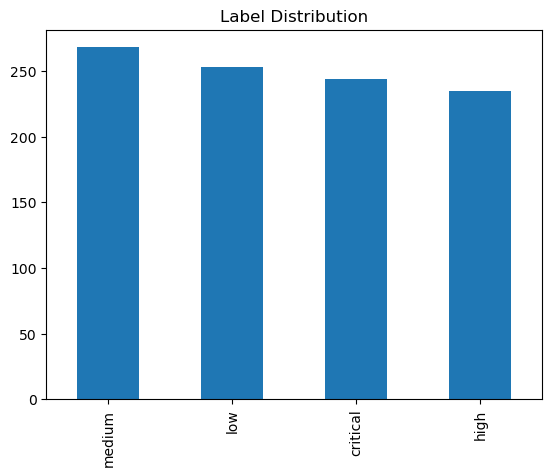

In [15]:
# 1. Label Distribution

import seaborn as sns
import matplotlib.pyplot as plt

df['severity'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.show()

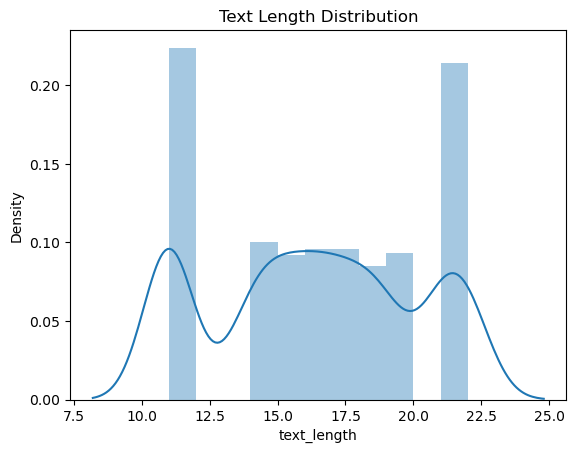

In [16]:
#2 Text Length Distributions

df['text_length'] = df['customer_text'].apply(len)
sns.distplot(df['text_length'])
plt.title('Text Length Distribution')
plt.show()


In [17]:
# Most Least Frequent Words
from collections import Counter

all_words = ' '.join(df['customer_text']).split()
word_freq = Counter(all_words)
print("Most Common Words:", word_freq.most_common(10))
print("Least Common Words:", word_freq.most_common()[:-10-1:-1])


Most Common Words: [('data', 216), ('system', 115), ('slow', 115), ('backup', 109), ('applic', 107), ('crash', 107), ('frequent', 107), ('sync', 107), ('across', 107), ('devic', 107)]
Least Common Words: [('declin', 85), ('got', 85), ('payment', 85), ('userfriendli', 92), ('ui', 92), ('updat', 93), ('new', 93), ('issu', 93), ('face', 93), ('bill', 96)]


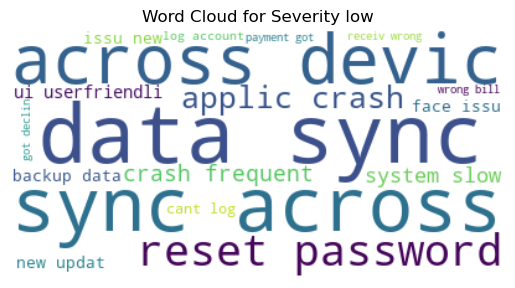

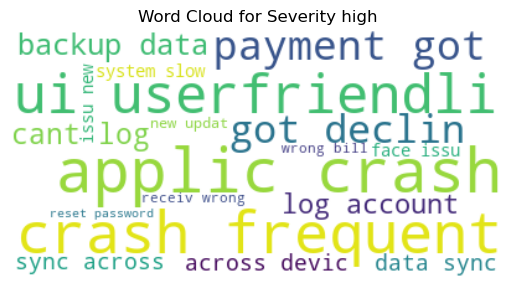

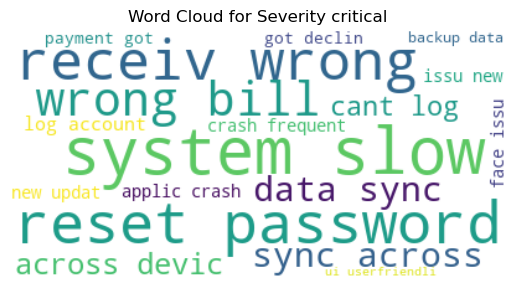

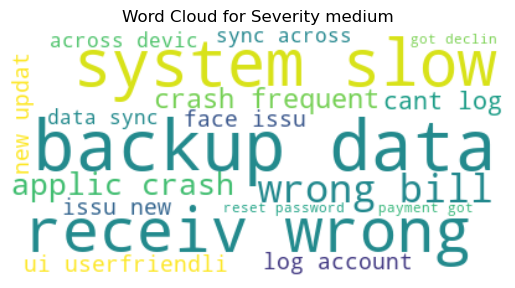

In [18]:
#word clouds for Each Label
from wordcloud import WordCloud

for label in df['severity'].unique():
    subset = df[df['severity'] == label]
    all_text = ' '.join(subset['customer_text'])
    wordcloud = WordCloud(background_color='white').generate(all_text)
    plt.figure()
    plt.title(f"Word Cloud for Severity {label}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


# Word Vectors using ELMO


In [20]:
# from allennlp.modules.elmo import Elmo, batch_to_ids

In [ ]:
#2 Set up ELMO 

# Options and weight files for ELMo
options_file = "https://allennlp.s3.amazonaws.com/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
weight_file = "https://allennlp.s3.amazonaws.com/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"

elmo = Elmo(options_file, weight_file, 1, dropout=0)


In [ ]:
#3 function to convert tokens into ELMo embeddings
def get_elmo_embedding(tokens, elmo_model):
    character_ids = batch_to_ids([tokens])
    embeddings = elmo_model(character_ids)
    return embeddings['elmo_representations'][0][0].detach().numpy().mean(axis=0)


In [ ]:
#4 Make new preidctions

def preprocess_new_data_elmo(new_data, elmo_model):
    cleaned_data, _, _ = preprocess_text(new_data)
    tokenized_text = nltk.word_tokenize(cleaned_data)
    word_vector_data = get_elmo_embedding(tokenized_text, elmo_model)
    return word_vector_data

def predict_new_data_elmo(new_data, model, elmo_model):
    processed_data = preprocess_new_data_elmo(new_data, elmo_model)
    prediction = model.predict([processed_data])
    return prediction[0]
